In [20]:
from numpy import log, corrcoef, unique, isnan, asarray
from numpy.random import shuffle

In [5]:
from pandas import read_csv

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
import altair as alt
alt.renderers.enable('default', embed_options={'actions': False})
alt.data_transformers.enable('data_server')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('data_server')

In [343]:
df = read_csv('../../data/FIA_multipleDroughts_forBill_NoDroughtThresh.csv')

In [344]:
df.loc[isnan(df['BAMort1(m2/ha)']), 'BAMort1(m2/ha)'] = 0
df.loc[isnan(df['BAMort2(m2/ha)']), 'BAMort2(m2/ha)'] = 0
df.loc[isnan(df['BAMort3(m2/ha)']), 'BAMort3(m2/ha)'] = 0
df.loc[isnan(df['BAMort4(m2/ha)']), 'BAMort4(m2/ha)'] = 0

In [345]:
df.loc[:,'Ratio2'] = df['BAMort2(m2/ha)'] / df['BA1(m2/ha)']
df.loc[:,'Ratio3'] = df['BAMort3(m2/ha)'] / df['BA2(m2/ha)']
df.loc[:,'LogRatio2'] = log(df['BAMort2(m2/ha)'] / df['BA1(m2/ha)'] + 0.001)
df.loc[:,'LogRatio3'] = log(df['BAMort3(m2/ha)'] / df['BA2(m2/ha)'] + 0.001)

In [297]:
df_ca = df[df['STATECD']==6]

In [243]:
alt.Chart(df_ca).mark_point(clip=True).encode(
    alt.X('BA1(m2/ha)', scale=alt.Scale(domain=(0, 50))),
    alt.Y('BAMort2(m2/ha)', scale=alt.Scale(domain=(0, 50))),
)

alt.Chart(...)

In [141]:
df_ca['LogRatio2'].max()

1.6644242943687708

In [244]:
alt.Chart(df_ca).mark_bar().encode(
    alt.X('LogRatio2', bin=alt.Bin(maxbins=50)),
    y='count()',
)

alt.Chart(...)

In [366]:
unique(df.FORTYPCD)

array([101, 102, 103, 104, 105, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 141, 142, 161, 162, 163, 164, 165, 166, 167, 168, 171, 182,
       184, 185, 201, 202, 203, 221, 222, 224, 225, 226, 241, 261, 262,
       263, 264, 265, 266, 267, 268, 269, 270, 271, 281, 301, 304, 305,
       321, 341, 361, 362, 363, 365, 366, 367, 368, 369, 371, 381, 383,
       384, 385, 391, 401, 402, 403, 404, 405, 406, 407, 409, 501, 502,
       503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515,
       516, 517, 519, 520, 601, 602, 605, 606, 607, 608, 609, 701, 702,
       703, 704, 705, 706, 707, 708, 709, 722, 801, 802, 805, 809, 901,
       902, 903, 904, 905, 911, 912, 921, 922, 923, 924, 931, 933, 934,
       935, 941, 942, 943, 961, 962, 971, 972, 973, 974, 975, 976, 982,
       983, 989, 991, 992, 995])

In [398]:
alt.Chart(df[df.FORTYPCD==185]).mark_point(clip=True).encode(
    alt.X('min_prec_spei2', scale=alt.Scale(domain=(-4, -0.5))),
    alt.Y('LogRatio2', scale=alt.Scale(domain=(-8, 1)))
)

alt.Chart(...)

In [322]:
alt.Chart(df[df['min_prec_spei2'] < -2]).mark_point(clip=True).encode(
    alt.X('BA1(m2/ha)', scale=alt.Scale(domain=(-5, 150))),
    alt.Y('Ratio2', scale=alt.Scale(domain=(-0.01, 0.7))),
    alt.Color('min_prec_spei2', scale=alt.Scale(domain=(-5,0)))
)

alt.Chart(...)

In [314]:
alt.Chart(df[df['min_prec_spei2'] > -2]).mark_point(clip=True).encode(
    alt.X('BA1(m2/ha)', scale=alt.Scale(domain=(-5, 150))),
    alt.Y('Ratio2', scale=alt.Scale(domain=(-0.01, 0.7))),
    alt.Color('min_prec_spei2', scale=alt.Scale(domain=(-5,0)))
)

alt.Chart(...)

In [144]:
isnan(df['BA1(m2/ha)']).sum()

989

In [401]:
x = df['min_prec_spei2'][df.FORTYPCD==185]
y = df['LogRatio2'][df.FORTYPCD==185]
isnan = (x.isnull() | y.isnull()) | (y < -6)
x = x[~isnan]
y = y[~isnan]

In [402]:
corrcoef(x, y)

array([[ 1.        , -0.11000019],
       [-0.11000019,  1.        ]])

In [211]:
y[x < -2].mean()

0.03558993912304001

In [210]:
y[(x > -2) & (x < -1.8)].mean()

0.035930693024880056

In [209]:
y[(x > -1.8) & (x < -1.5)].mean()

0.03650251672640147

In [208]:
y[(x > -1.5) & (x < -1.2)].mean()

0.03627066303837359

In [207]:
y[((x > -1.2) & (x < 0))].mean()

0.03797455056149046

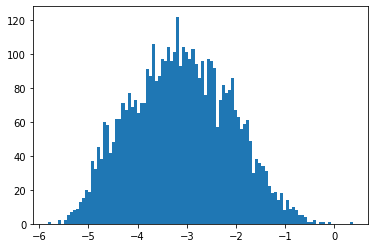

In [165]:
plt.hist(log(y[(x > -2) & (x < -1.8)].dropna()), bins=100);

In [460]:
df_ca = df[df['STATECD']==6]
df_ca['R2'] = log(df_ca['BAMort2(m2/ha)'] / df_ca['BA1(m2/ha)'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [425]:
import altair as alt
alt.renderers.enable('default', embed_options={'actions': False})
alt.data_transformers.enable('data_server')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('data_server')

In [463]:
alt.Chart(df_ca).mark_point(clip=True).encode(
    alt.X('BA1(m2/ha)', scale=alt.Scale(domain=(0, 50))),
    alt.Y('BAMort2(m2/ha)', scale=alt.Scale(domain=(0, 50))),
)

alt.Chart(...)

In [462]:
alt.Chart(df_ca).mark_point(clip=True).encode(
    alt.X('min_prec_spei2', scale=alt.Scale(domain=(-3, 0))),
    alt.Y('R2', scale=alt.Scale(domain=(-6, 3))),
)

alt.Chart(...)

In [12]:
import gcsfs
import zarr

In [13]:
gcs = gcsfs.GCSFileSystem(anon=True)
store = gcsfs.GCSMap(root='carbonplan-scratch/terraclimate-fia-cond.zarr', gcs=gcs, check=False)
root = zarr.group(store=store)

In [21]:
a = asarray(root['PDSI'])

In [37]:
asarray(root['time'])

array([21184., 21215., 21243., 21274., 21304., 21335., 21365., 21396.,
       21427., 21457., 21488., 21518., 21549., 21580., 21608., 21639.,
       21669., 21700., 21730., 21761., 21792., 21822., 21853., 21883.,
       21914., 21945., 21974., 22005., 22035., 22066., 22096., 22127.,
       22158., 22188., 22219., 22249., 22280., 22311., 22339., 22370.,
       22400., 22431., 22461., 22492., 22523., 22553., 22584., 22614.,
       22645., 22676., 22704., 22735., 22765., 22796., 22826., 22857.,
       22888., 22918., 22949., 22979., 23010., 23041., 23069., 23100.,
       23130., 23161., 23191., 23222., 23253., 23283., 23314., 23344.,
       23375., 23406., 23435., 23466., 23496., 23527., 23557., 23588.,
       23619., 23649., 23680., 23710., 23741., 23772., 23800., 23831.,
       23861., 23892., 23922., 23953., 23984., 24014., 24045., 24075.,
       24106., 24137., 24165., 24196., 24226., 24257., 24287., 24318.,
       24349., 24379., 24410., 24440., 24471., 24502., 24530., 24561.,
      

In [34]:
len(asarray(root['lon']))

10000